# Quick notebook to read and analyze processed data file

## Imports

In [110]:
import os 
import pickle

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## Set params

In [99]:
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=16)    # fontsize of the x and y labels

## Load data

In [100]:
# # data path 
# data_filename =  '2024_04_26_0008_processed.pkl'  # '2024_04_23_0002_processed.pkl'  # '2024_04_29_0004_processed.pkl'  

In [135]:
# paths to data
data_root = '/media/sam/SamData/HighSpeedVideo/Mosquitoes'
data_folder = '11_20240423' # '05_20240322'  #'08_20240401' # '04_20240321' #   '05_20240322'  # '03_20240319' # 
axo_num = 2
vid_str = 'aedes_C001H001S0001_20240326_154951'

data_path = os.path.join(data_root, data_folder, 'axo_recording_{:02d}'.format(axo_num))
data_filename = [fn for fn in os.listdir(data_path) if fn.endswith('.pkl')][0]

data_path_full = os.path.join(data_path, data_filename)
print(data_path_full)

/media/sam/SamData/HighSpeedVideo/Mosquitoes/11_20240423/axo_recording_02/2024_04_23_0002_processed.pkl


In [136]:
# load pickled dictionary
data = pickle.load( open( data_path_full, "rb" ) )

In [137]:
# print the fields of data
for key in data.keys():
    print(key)


sampling_freq
filepath
units
header
time
emg
cam
mic
mic_filt
mic_phase
wbf_mean
wbf
emg_filt
spikes
spike_t
spike_idx
params


## Calculate vector strength

In [138]:
# read out data 
t = data['time']  
mic_phase = data['mic_phase'] 
emg_filt = data['emg_filt']
spike_idx = data['spike_idx']


Text(0.5, 0, 'time (s)')

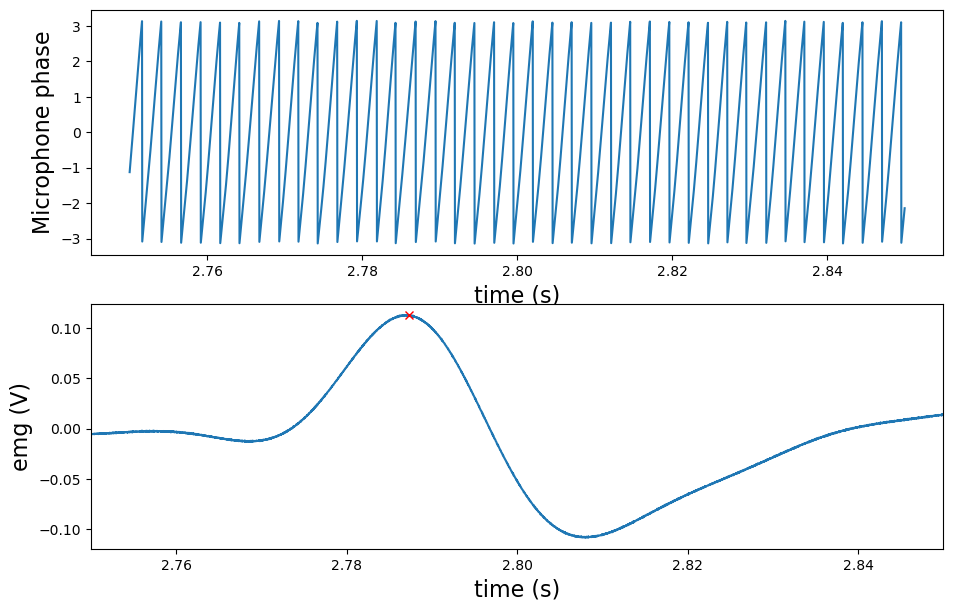

In [145]:
# visualize this data
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(11,7))

# limiting the plot to small amount of data (t values between xmin and xmax)
xmin =  2.75
xmax =  2.85
mask = (t >= xmin) & (t <= xmax)
peaks_mask = (t[spike_idx] >= xmin) & (t[spike_idx] <= xmax)

# mic phase
ax1.plot(t[mask], mic_phase[mask])
ax1.set_ylabel('Microphone phase')
ax1.set_xlabel('time (s)')

# detected spikes
ax2.plot(t[mask], emg_filt[mask])
ax2.plot(t[spike_idx][peaks_mask], emg_filt[spike_idx][peaks_mask], 'rx')

ax2.autoscale(enable=True, axis='x', tight=True)
ax2.set_ylabel('emg (V)')
ax2.set_xlabel('time (s)')


In [140]:
# get the microphone phase as measured at the time of MN spike
spike_phase = mic_phase[spike_idx]


Text(0, 0.5, 'pdf')

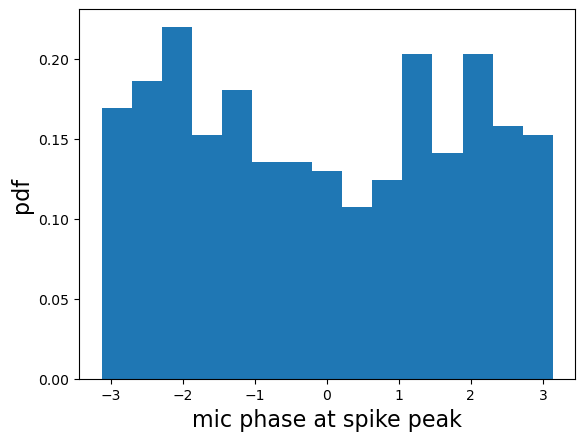

In [141]:
# visualize spike phase distribution as histogram
fig, ax = plt.subplots()

ax.hist(spike_phase, bins=15, density=True) ;
ax.set_xlabel('mic phase at spike peak')
ax.set_ylabel('pdf')


In [142]:
# now calculate scalar vector strength - first convert phase to unit vectors
vector_x = np.cos(spike_phase)
vector_y = np.sin(spike_phase)

x_mean = np.mean(vector_x)
y_mean = np.mean(vector_y)

print('mean x value: ', x_mean)
print('mean y value: ', y_mean)

mean x value:  -0.07146989794123274
mean y value:  -0.021768951293972213


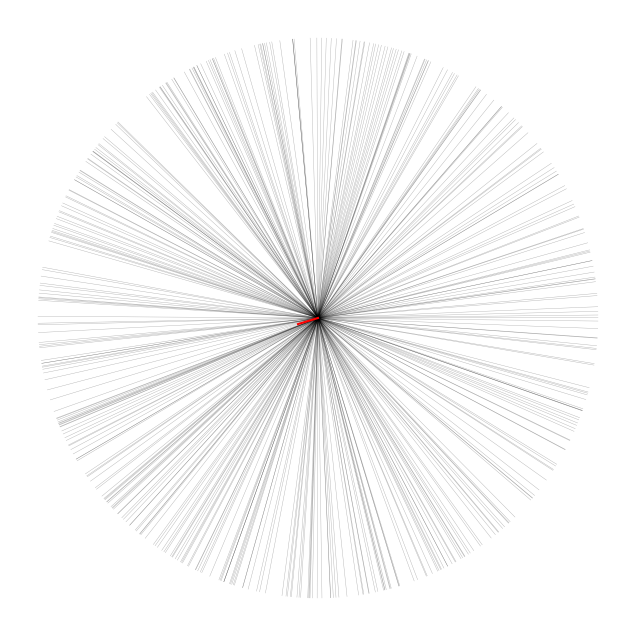

In [143]:
# visualize vector strength
fig, ax = plt.subplots(figsize=(8,8))

for x, y in zip(vector_x, vector_y):
    ax.plot([0, x], [0, y], 'k-', lw=0.3, alpha=0.3) 
ax.plot([0, x_mean], [0, y_mean], 'r-')

ax.axis('square') ;
ax.set_axis_off()

# fig.savefig('test2.png')